## Exploratory Data Analysis and Predictive Modeling

### Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Read the Data

In [2]:
df = pd.read_csv('data_perm_take_home.csv',encoding='unicode_escape')

### Basic Exploration

In [3]:
df.head()

,case_number,case_received_date,decision_date,case_status,employer_name,employer_num_employees,employer_yr_established,job_education,job_experience_num_months,job_state,job_foreign_lang_req,job_level,employee_citizenship,wage_offer,wage_unit
0,A-06191-36805,12/22/14,6/19/15,Certified,BRENTWOOD BIOMEDICAL RESEARCH INSTITUTE,149.0,1988.0,Bachelor's,NaN,CALIFORNIA,N,1.0,RUSSIA,30285.0,Year
1,A-07194-56311,12/19/14,6/19/15,Denied,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,2.0,RUSSIA,150000.0,Year
2,A-07194-56513,12/17/14,6/19/15,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,2.0,INDIA,125000.0,Year
3,A-07194-56514,10/9/14,3/3/15,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,84.0,WASHINGTON,N,3.0,CANADA,105300.0,Year
4,A-07197-57029,10/6/14,3/3/15,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,1.0,ARGENTINA,114285.0,Year


In [4]:
df.shape

(61613, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61613 entries, 0 to 61612
Data columns (total 15 columns):
case_number                  61613 non-null object
case_received_date           61611 non-null object
decision_date                61613 non-null object
case_status                  61613 non-null object
employer_name                61611 non-null object
employer_num_employees       61593 non-null float64
employer_yr_established      61577 non-null float64
job_education                61609 non-null object
job_experience_num_months    33996 non-null float64
job_state                    61602 non-null object
job_foreign_lang_req         61611 non-null object
job_level                    57066 non-null float64
employee_citizenship         61604 non-null object
wage_offer                   61598 non-null float64
wage_unit                    60951 non-null object
dtypes: float64(5), object(10)
memory usage: 7.1+ MB


In [6]:
df.columns

Index(['case_number', 'case_received_date', 'decision_date', 'case_status',
       'employer_name', 'employer_num_employees', 'employer_yr_established',
       'job_education', 'job_experience_num_months', 'job_state',
       'job_foreign_lang_req', 'job_level', 'employee_citizenship',
       'wage_offer', 'wage_unit'],
      dtype='object')

### Converting date columns from object/string to pandas date time 

In [7]:
df['case_received_date'] = pd.to_datetime(df['case_received_date'], format='%m/%d/%y')

In [8]:
df['decision_date'] = pd.to_datetime(df['decision_date'], format='%m/%d/%y')

In [9]:
df[['case_received_date', 'decision_date']].head()

,case_received_date,decision_date
0,2014-12-22,2015-06-19
1,2014-12-19,2015-06-19
2,2014-12-17,2015-06-19
3,2014-10-09,2015-03-03
4,2014-10-06,2015-03-03


## -------------------------- Part 1 - Exploratory Data Analysis / Warm Up --------------------------

## 1. Which employer has the most entries in the dataset?

### A. COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION

In [10]:
df['employer_name'].value_counts(dropna=False)

COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    5441
INTEL CORPORATION                                1611
CISCO SYSTEMS, INC.                              1028
GOOGLE INC.                                       914
QUALCOMM TECHNOLOGIES INC.                        862
MICROSOFT CORPORATION                             642
AMAZON CORPORATE LLC                              533
ORACLE AMERICA, INC.                              435
APPLE INC.                                        333
ERNST & YOUNG U.S. LLP                            296
INFOSYS TECHNOLOGIES LIMITED                      277
FACEBOOK, INC.                                    262
IGATE TECHNOLOGIES, INC.                          217
HCL AMERICA INC.                                  213
JP MORGAN CHASE & CO                              206
DELOITTE CONSULTING LLP                           199
CAPGEMINI FINANCIAL SERVICES USA INC.             189
HOUSE OF RAEFORD FARMS, INC                       183
IBM CORPORATION             

In [11]:
df['employer_name'].isnull().sum()

2

## 2. Which employer has the most “Certified-Expired” cases?

## A. MICROSOFT CORPORATION

In [12]:
df['case_status'].value_counts(dropna=False)

Certified            37930
Certified-Expired    16173
Denied                4245
Withdrawn             3265
Name: case_status, dtype: int64

In [13]:
df['case_status'].isnull().sum()

0

In [14]:
df.loc[df['case_status']=='Certified-Expired', 'employer_name'].value_counts(dropna=False)

MICROSOFT CORPORATION                         521
CISCO SYSTEMS, INC.                           398
QUALCOMM TECHNOLOGIES INC.                    269
GOOGLE INC.                                   253
AMAZON CORPORATE LLC                          231
ORACLE AMERICA, INC.                          130
HCL AMERICA INC.                              120
APPLE INC.                                    113
GOLDMAN SACHS & CO.                           108
DELOITTE CONSULTING LLP                        91
INFOSYS LTD.                                   87
FACEBOOK, INC.                                 79
ERNST & YOUNG U.S. LLP                         73
BROADCOM CORPORATION                           66
VMWARE, INC.                                   64
YAHOO! INC.                                    63
IBM CORPORATION                                57
HOUSE OF RAEFORD FARMS, INC                    54
HEXAWARE TECHNOLOGIES, INC.                    51
TWITTER, INC.                                  51


## 3. How many unique employers contain the character string "APPLE" that is not "APPLE INC."?

### A. 6 Employers

In [15]:
unique_employers = pd.Series(df['employer_name'].unique())

In [16]:
unique_employers = unique_employers[~unique_employers.isin(['APPLE INC.', np.nan])]

In [17]:
unique_employers.str.contains('APPLE').sum()

6

In [18]:
unique_employers[unique_employers.str.contains('APPLE')]

2341     APPLETREE EARLY LEARNING PUBLIC CHARTER SCHOOLS
3980                           APPLEXUS TECHNOLOGIES LLC
6442                                    APPLETON GRP LLC
10248                         APPLE EDUCATIONAL SERVICES
13115                    BIG APPLE EDUCATION CENTER INC.
14924                         APPLE FEDERAL CREDIT UNION
dtype: object

## 4. Write a function that plots a histogram with 50 bins of the duration between from case_received_date to decision_date for any given employeer_name. Use the function to plot for "APPLE INC." and "GOOGLE INC."

### A.

### Assumptions

### Assuming case_received_date and decision_date columsn are in pandas datetime data type

### For time being, I wrote the function only with one argument employer_name. We can generalize this function by making few changes. More or less, logic will be in similar lines only 

In [19]:
def plot_histogram(employer_name):
    
    ''' This function was used to plot the histogram for case decision duration 
    
    Arguments
    ---------
    employer_name: Name of the employer
    
    Returns
    --------
    Histogram of Case decision duration with 50 bins
    
    '''
    
    temp_df = df.loc[df['employer_name']==employer_name, ['case_received_date', 'decision_date']]
    temp_df['case_decision_duration'] = (temp_df['decision_date'] - temp_df['case_received_date'])/np.timedelta64(1, 'D')
    
    plt.figure(figsize=(10,6))
    plt.hist(temp_df['case_decision_duration'], bins = 50)
    plt.title(' Histogram/Frequency Distribution of Case Decision Duration for ' + employer_name)
    plt.xlabel('Case Decision Duration')
    plt.ylabel('Frequency')
    plt.show()
    

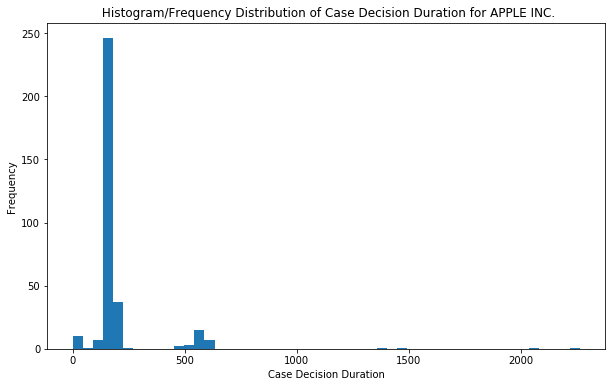

In [20]:
plot_histogram('APPLE INC.')

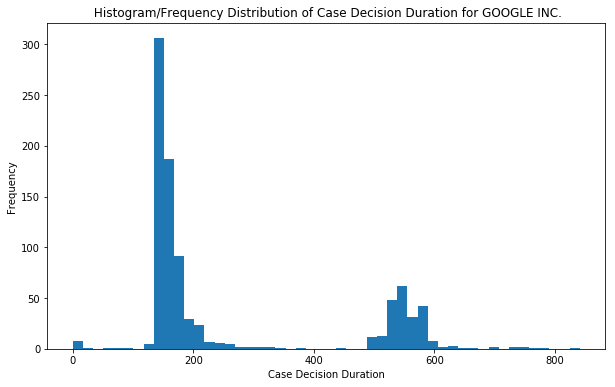

In [21]:
plot_histogram('GOOGLE INC.')

## ------------------------------------- Part 2 - Data Modeling -------------------------------------

### Subsetting the relevant data for modeling i.e. subset the certified cases

In [22]:
df['case_status'].value_counts()

Certified            37930
Certified-Expired    16173
Denied                4245
Withdrawn             3265
Name: case_status, dtype: int64

In [23]:
df_modeling = df[df['case_status']=='Certified']

### Shape of the new data

In [24]:
df_modeling.shape

(37930, 15)

### Glimpse of the data

In [25]:
df_modeling.head()

,case_number,case_received_date,decision_date,case_status,employer_name,employer_num_employees,employer_yr_established,job_education,job_experience_num_months,job_state,job_foreign_lang_req,job_level,employee_citizenship,wage_offer,wage_unit
0,A-06191-36805,2014-12-22,2015-06-19,Certified,BRENTWOOD BIOMEDICAL RESEARCH INSTITUTE,149.0,1988.0,Bachelor's,NaN,CALIFORNIA,N,1.0,RUSSIA,30285.0,Year
2,A-07194-56513,2014-12-17,2015-06-19,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,2.0,INDIA,125000.0,Year
3,A-07194-56514,2014-10-09,2015-03-03,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,84.0,WASHINGTON,N,3.0,CANADA,105300.0,Year
4,A-07197-57029,2014-10-06,2015-03-03,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,1.0,ARGENTINA,114285.0,Year
5,A-07206-60089,2014-08-18,2015-01-02,Certified,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,NaN,WASHINGTON,N,2.0,CANADA,88400.0,Year


### Data Exploration

### Missing Values

In [26]:
miss_val_cnt = df_modeling.isnull().sum()
miss_val_cnt

case_number                      0
case_received_date               0
decision_date                    0
case_status                      0
employer_name                    0
employer_num_employees           0
employer_yr_established          1
job_education                    0
job_experience_num_months    16933
job_state                        0
job_foreign_lang_req             0
job_level                     2653
employee_citizenship             0
wage_offer                       0
wage_unit                      365
dtype: int64

In [27]:
miss_val_cnt/df_modeling.shape[0]*100

case_number                   0.000000
case_received_date            0.000000
decision_date                 0.000000
case_status                   0.000000
employer_name                 0.000000
employer_num_employees        0.000000
employer_yr_established       0.002636
job_education                 0.000000
job_experience_num_months    44.642763
job_state                     0.000000
job_foreign_lang_req          0.000000
job_level                     6.994463
employee_citizenship          0.000000
wage_offer                    0.000000
wage_unit                     0.962299
dtype: float64

### job_experience_num_months column is having nearly ~45% of missing values. Almost half of the cases don't have the information on experience. We need to drop this column from dataset

In [28]:
df_modeling = df_modeling.drop('job_experience_num_months', axis = 1)

### case_number - Unique identifier of the case. Can't use this column in analysis

In [29]:
df_modeling['case_number'].nunique()

37930

### Case_status - Zero Variance variable i.e. all values are same - Certified

In [30]:
df_modeling = df_modeling.drop('case_status', axis = 1)

### employer_name

In [31]:
df_modeling['employer_name'].unique()

array(['BRENTWOOD BIOMEDICAL RESEARCH INSTITUTE',
       'WASHINGTON STATE UNIVERSITY', 'CONCEPT SCHOOLS NFP', ...,
       'S&S Waterproofing Inc.', 'ARECONT VISION, LLC.',
       'JASS & ASSOCIATES,INC.'], dtype=object)

In [32]:
df_modeling['employer_name'].nunique()

11528

In [33]:
employers_freq_cnts = df_modeling['employer_name'].value_counts(dropna=False).reset_index()
employers_freq_cnts.columns = ['employer_name', 'frequency']

In [34]:
employers_freq_cnts.head()

,employer_name,frequency
0,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,5356
1,INTEL CORPORATION,1313
2,GOOGLE INC.,622
3,"CISCO SYSTEMS, INC.",610
4,QUALCOMM TECHNOLOGIES INC.,583


In [35]:
employers_freq_cnts['frequency'].describe()

count    11528.000000
mean         3.290250
std         52.860926
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5356.000000
Name: frequency, dtype: float64

### Histogram

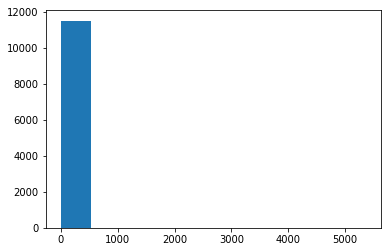

In [36]:
plt.hist(employers_freq_cnts['frequency'])
plt.show()

### Boxplot

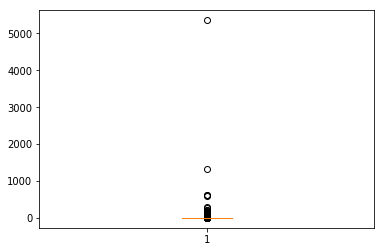

In [37]:
plt.boxplot(employers_freq_cnts['frequency'])
plt.show()

In [38]:
employers_freq_cnts['cum_frequency'] = employers_freq_cnts['frequency'].cumsum()

In [39]:
employers_freq_cnts[employers_freq_cnts['cum_frequency']<=0.8*df_modeling.shape[0]].tail()

,employer_name,frequency,cum_frequency
3937,"PRO SOURCE REHAB, INC.",1,30340
3938,QUANTUM SPATIAL,1,30341
3939,IMAGINE COMMUNICATIONS CORP,1,30342
3940,"WESTERNACHER & PARTNER CONSULTING, INC.",1,30343
3941,GWINNETT HOSPITAL SYSTEM,1,30344


In [40]:
employers_freq_cnts[employers_freq_cnts['frequency']>=100].shape

(21, 3)

In [41]:
employers_freq_cnts

,employer_name,frequency,cum_frequency
0,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,5356,5356
1,INTEL CORPORATION,1313,6669
2,GOOGLE INC.,622,7291
3,"CISCO SYSTEMS, INC.",610,7901
4,QUALCOMM TECHNOLOGIES INC.,583,8484
5,AMAZON CORPORATE LLC,285,8769
6,"ORACLE AMERICA, INC.",275,9044
7,ERNST & YOUNG U.S. LLP,217,9261
8,APPLE INC.,205,9466
9,"IGATE TECHNOLOGIES, INC.",197,9663


### Combining the levels - Employers with minimum frequncy of 100 will be considering as at is. Remaining employers are flagging as 'Other'

In [58]:
top_freq_employers = list(employers_freq_cnts.loc[employers_freq_cnts['frequency']>=100, 'employer_name'])

In [59]:
top_freq_employers

['COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION',
 'INTEL CORPORATION',
 'GOOGLE INC.',
 'CISCO SYSTEMS, INC.',
 'QUALCOMM TECHNOLOGIES INC.',
 'AMAZON CORPORATE LLC',
 'ORACLE AMERICA, INC.',
 'ERNST & YOUNG U.S. LLP',
 'APPLE INC.',
 'IGATE TECHNOLOGIES, INC.',
 'CAPGEMINI FINANCIAL SERVICES USA INC.',
 'FACEBOOK, INC.',
 'JP MORGAN CHASE & CO',
 'KOCH FOODS OF ALABAMA, LLC',
 'ERICSSON INC.',
 'HOUSE OF RAEFORD FARMS, INC',
 'CASE FARMS PROCESSING INC.',
 'MICROSOFT CORPORATION',
 'DELOITTE CONSULTING LLP',
 'EPIC SYSTEMS CORPORATION',
 'HER SERVICES']

In [60]:
df_modeling['employer_name_merged'] = df_modeling['employer_name']. \
            apply(lambda x: x if (x in top_freq_employers) else 'Other')

In [61]:
df_modeling['employer_name_merged'].value_counts()

Other                                            26914
COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION     5356
INTEL CORPORATION                                 1313
GOOGLE INC.                                        622
CISCO SYSTEMS, INC.                                610
QUALCOMM TECHNOLOGIES INC.                         583
AMAZON CORPORATE LLC                               285
ORACLE AMERICA, INC.                               275
ERNST & YOUNG U.S. LLP                             217
APPLE INC.                                         205
IGATE TECHNOLOGIES, INC.                           197
CAPGEMINI FINANCIAL SERVICES USA INC.              169
FACEBOOK, INC.                                     162
JP MORGAN CHASE & CO                               155
KOCH FOODS OF ALABAMA, LLC                         133
ERICSSON INC.                                      117
HOUSE OF RAEFORD FARMS, INC                        107
CASE FARMS PROCESSING INC.                         104
MICROSOFT 

### employer_yr_established

In [64]:
df_modeling['employer_yr_established'].value_counts(dropna=False)

 1994.0    5933
 1998.0    1622
 1999.0    1404
 1968.0    1393
 2004.0    1246
 2011.0    1215
 2006.0    1121
 1984.0    1030
 2000.0     977
 2007.0     967
 2008.0     960
 2001.0     953
 2005.0     877
 1997.0     857
 2002.0     779
 2003.0     762
 1989.0     747
 2010.0     746
 2009.0     706
 1996.0     684
 1995.0     612
 1977.0     576
 2012.0     521
 1993.0     486
 1986.0     486
 1979.0     458
 1988.0     430
 1991.0     366
 1990.0     345
 1987.0     293
           ... 
 1701.0       5
 1826.0       5
 1942.0       5
 1804.0       5
 1874.0       5
 1833.0       4
 1829.0       4
 1834.0       4
 1766.0       3
 1789.0       3
 1818.0       3
 1825.0       3
 1811.0       3
 1854.0       3
 1783.0       3
 1769.0       3
 1824.0       2
 1795.0       2
 1807.0       2
 1809.0       2
 1793.0       2
 1810.0       1
 1840.0       1
NaN           1
 1744.0       1
 1727.0       1
 1787.0       1
 1815.0       1
 1822.0       1
 1791.0       1
Name: employer_yr_establ

In [65]:
df_modeling['employer_yr_established'].nunique()

219

### There will be association between employer and year established

### Only 1 missing value in the data

In [66]:
df_modeling[df_modeling['employer_yr_established'].isnull()]

,case_number,case_received_date,decision_date,employer_name,employer_num_employees,employer_yr_established,job_education,job_state,job_foreign_lang_req,job_level,employee_citizenship,wage_offer,wage_unit,employer_name_merged
16262,A-14041-40526,2014-01-31,2015-06-23,ZFGAINESVILLE LLC,500.0,NaN,Master's,GEORGIA,N,4.0,MEXICO,90938.0,Year,Other


In [68]:
df_modeling[df_modeling['employer_name']=='ZFGAINESVILLE LLC'].index

Int64Index([16262], dtype='int64')

### Number of employees of are close to 500 that means small size company. Either we can impute with recent years or we can drop this row 

In [69]:
df_modeling = df_modeling.drop(df_modeling[df_modeling['employer_name']=='ZFGAINESVILLE LLC'].index, axis=0)

### instead of using year variable as it is, we can derive new variable by calculating the number of years of company establishment

In [72]:
df_modeling['no_of_years'] = 2014 - df_modeling['employer_yr_established']

### We will not considered the Case related variables like case_received_date and decision_date  because wage offered will not depend on this info

In [74]:
df_modeling['job_level'].value_counts(dropna=False)

 2.0    13200
 4.0    11137
 3.0     6042
 1.0     4897
NaN      2653
Name: job_level, dtype: int64

In [76]:
df_modeling['job_education'].value_counts(dropna=False)

Master's       17197
Bachelor's     15664
None            2053
Doctorate       1467
Other           1060
High School      282
Associate's      206
Name: job_education, dtype: int64

In [77]:
pd.crosstab(df_modeling['job_education'], df_modeling['job_level'])

job_level,1.0,2.0,3.0,4.0
job_education,,,,
Associate's,51,62,21,67
Bachelor's,2082,4345,709,7440
Doctorate,479,198,562,102
High School,58,24,94,105
Master's,812,8126,4007,2855
None,914,164,490,469
Other,501,281,159,99


### Imputing the missing values with mode

In [80]:
df_modeling.loc[df_modeling['job_level'].isnull(), 'job_level'] = df_modeling['job_level'].mode()[0]

In [81]:
df_modeling['job_level'].value_counts()

2.0    15853
4.0    11137
3.0     6042
1.0     4897
Name: job_level, dtype: int64

### wage_unit

In [82]:
df_modeling['wage_unit'].nunique()

4

In [83]:
df_modeling['wage_unit'].unique()

array(['Year', 'Hour', nan, 'Month', 'Week'], dtype=object)

In [84]:
pd.crosstab(df_modeling['job_education'], df_modeling['wage_unit'])

wage_unit,Hour,Month,Week,Year
job_education,,,,
Associate's,3,0,0,200
Bachelor's,33,1,2,15571
Doctorate,1,0,1,1459
High School,8,0,0,264
Master's,61,0,1,17036
None,305,1,0,1601
Other,31,0,0,985


In [85]:
pd.crosstab(df_modeling['job_level'], df_modeling['wage_unit'])

wage_unit,Hour,Month,Week,Year
job_level,,,,
1.0,290,0,0,4441
2.0,75,1,3,15645
3.0,55,0,0,5959
4.0,22,1,1,11071


In [86]:
df_modeling.loc[df_modeling['wage_unit'].isnull(), 'wage_unit'] = df_modeling['wage_unit'].mode()[0]

### wage_offer

In [87]:
df_modeling['wage_offer'].describe()

count    3.792900e+04
mean     9.148167e+04
std      3.960048e+04
min      7.250000e+00
25%      7.246700e+04
50%      8.900000e+04
75%      1.095000e+05
max      1.145000e+06
Name: wage_offer, dtype: float64

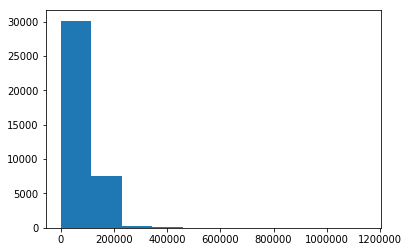

In [88]:
plt.hist(df_modeling['wage_offer'])
plt.show()

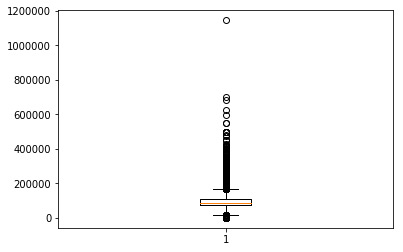

In [89]:
plt.boxplot(df_modeling['wage_offer'])
plt.show()

### Right Skewed/Positively Skewed

### Log distribution

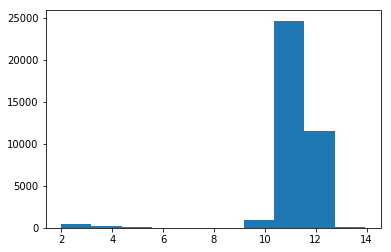

In [93]:
plt.hist(np.log(df_modeling['wage_offer']))
plt.show()

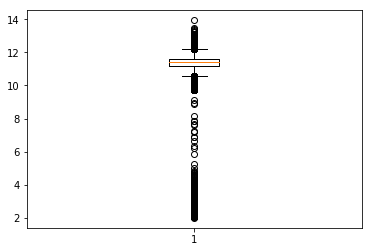

In [94]:
plt.boxplot(np.log(df_modeling['wage_offer']))
plt.show()

### Square root distribution

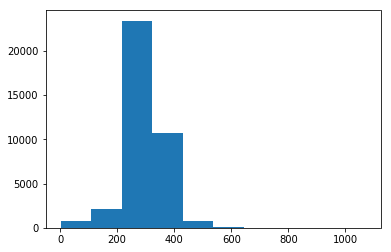

In [95]:
plt.hist(np.sqrt(df_modeling['wage_offer']))
plt.show()

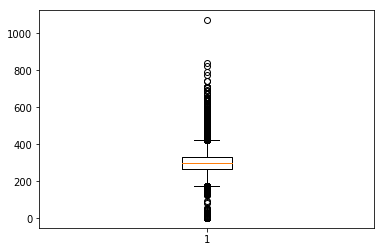

In [96]:
plt.boxplot(np.sqrt(df_modeling['wage_offer']))
plt.show()

### Inverse transform

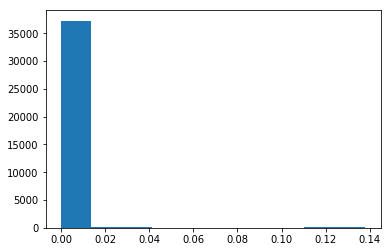

In [97]:
plt.hist(1/(df_modeling['wage_offer']))
plt.show()

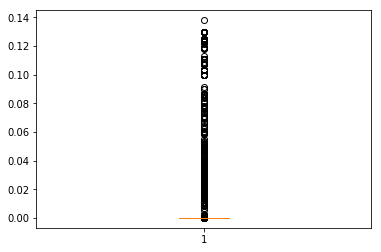

In [98]:
plt.boxplot(1/(df_modeling['wage_offer']))
plt.show()

### We can apply boxcox transformation to get the approximate normal distribution

In [99]:
from scipy import stats

In [101]:
box_cox_transform = stats.boxcox(df_modeling['wage_offer'])
box_cox_transform

(array([1598.24106448, 4176.78080545, 3718.62505744, ..., 3935.84016868,
        3877.32234738,   19.59803271]), 0.6772190059364744)

### X* = (X^a - 1)/a here, a is 0.6772

In [102]:
df_modeling['wage_offer_transformed'] = box_cox_transform[0]

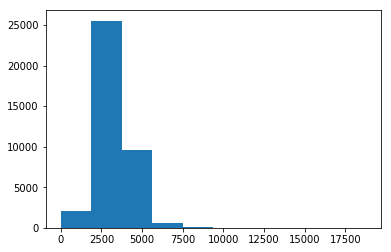

In [103]:
plt.hist(df_modeling['wage_offer_transformed'])
plt.show()

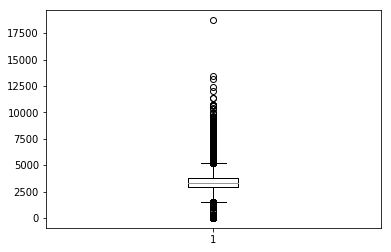

In [104]:
plt.boxplot(df_modeling['wage_offer_transformed'])
plt.show()

In [106]:
df_modeling.head()

,case_number,case_received_date,decision_date,employer_name,employer_num_employees,employer_yr_established,job_education,job_state,job_foreign_lang_req,job_level,employee_citizenship,wage_offer,wage_unit,employer_name_merged,no_of_years,wage_offer_transformed
0,A-06191-36805,2014-12-22,2015-06-19,BRENTWOOD BIOMEDICAL RESEARCH INSTITUTE,149.0,1988.0,Bachelor's,CALIFORNIA,N,1.0,RUSSIA,30285.0,Year,Other,26.0,1598.241064
2,A-07194-56513,2014-12-17,2015-06-19,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,WASHINGTON,N,2.0,INDIA,125000.0,Year,Other,124.0,4176.780805
3,A-07194-56514,2014-10-09,2015-03-03,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,WASHINGTON,N,3.0,CANADA,105300.0,Year,Other,124.0,3718.625057
4,A-07197-57029,2014-10-06,2015-03-03,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,WASHINGTON,N,1.0,ARGENTINA,114285.0,Year,Other,124.0,3930.738795
5,A-07206-60089,2014-08-18,2015-01-02,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,WASHINGTON,N,2.0,CANADA,88400.0,Year,Other,124.0,3302.997439


In [109]:
df_modeling['wage_offer_transformed'] = df_modeling['wage_offer_transformed'].apply(lambda x: round(x,0))

In [110]:
df_modeling

,case_number,case_received_date,decision_date,employer_name,employer_num_employees,employer_yr_established,job_education,job_state,job_foreign_lang_req,job_level,employee_citizenship,wage_offer,wage_unit,employer_name_merged,no_of_years,wage_offer_transformed
0,A-06191-36805,2014-12-22,2015-06-19,BRENTWOOD BIOMEDICAL RESEARCH INSTITUTE,149.0,1988.0,Bachelor's,CALIFORNIA,N,1.0,RUSSIA,30285.00,Year,Other,26.0,1598.0
2,A-07194-56513,2014-12-17,2015-06-19,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,WASHINGTON,N,2.0,INDIA,125000.00,Year,Other,124.0,4177.0
3,A-07194-56514,2014-10-09,2015-03-03,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,WASHINGTON,N,3.0,CANADA,105300.00,Year,Other,124.0,3719.0
4,A-07197-57029,2014-10-06,2015-03-03,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,WASHINGTON,N,1.0,ARGENTINA,114285.00,Year,Other,124.0,3931.0
5,A-07206-60089,2014-08-18,2015-01-02,WASHINGTON STATE UNIVERSITY,5600.0,1890.0,Doctorate,WASHINGTON,N,2.0,CANADA,88400.00,Year,Other,124.0,3303.0
9,A-08150-56796,2013-09-18,2015-04-17,CONCEPT SCHOOLS NFP,48.0,2002.0,Master's,ILLINOIS,N,2.0,UZBEKISTAN,60258.00,Year,Other,12.0,2548.0
14,A-08220-76847,2008-08-08,2015-02-04,NENNI EQUIPMENT CORPORATION,8.0,1988.0,None,NEW YORK,N,2.0,UNITED STATES OF AMERICA,25.04,Hour,Other,26.0,12.0
24,A-08281-94029,2013-11-07,2015-03-30,"MEDICAL DYNAMIC SYSTEMS, INC",90.0,2004.0,Bachelor's,NEW YORK,N,2.0,PHILIPPINES,93700.00,Year,Other,10.0,3436.0
28,A-08298-99073,2008-10-24,2015-06-17,FIDELUS TECHNOLOGIES,40.0,2002.0,None,NEW YORK,N,3.0,CANADA,81000.00,Year,Other,12.0,3113.0
35,A-08319-05822,2008-12-22,2015-02-02,AMERICAN EXPRESS TRAVEL RELATED SERVICES,33010.0,1850.0,Bachelor's,ARIZONA,N,3.0,INDIA,87500.00,Year,Other,164.0,3280.0


In [119]:
df_modeling_final = df_modeling[['employer_name_merged', 'wage_unit', 'no_of_years',
                                 'wage_offer_transformed', 'employee_citizenship', 'job_foreign_lang_req',
                                 'job_level', 'job_education', 'job_state','employer_num_employees', 'wage_offer']]

### Bi-Variate analysis

### Pearson Correlation matrix

In [121]:
df_modeling_final[['no_of_years', 'employer_num_employees', 'wage_offer_transformed']].corr()

,no_of_years,employer_num_employees,wage_offer_transformed
no_of_years,1.000000,0.204704,0.082906
employer_num_employees,0.204704,1.000000,0.080576
wage_offer_transformed,0.082906,0.080576,1.000000


In [122]:
df_modeling_final.groupby(['employee_citizenship']).agg({'wage_offer':['sum','min','max','mean']}).\
                                reset_index()

employee_citizenship    wage_offer                        \
                                        sum        min        max   
0                 AFGHANISTAN  1.385820e+05   30222.00   63860.00   
1                     ALBANIA  5.615920e+05   44472.00  180000.00   
2                     ALGERIA  2.646380e+05   69035.00  195603.00   
3                      ANGOLA  2.988740e+05   78478.00  127150.00   
4         ANTIGUA AND BARBUDA  1.423035e+05   65584.37   76719.17   
5                   ARGENTINA  1.066719e+07   20800.00  425000.00   
6                     ARMENIA  8.900070e+05   25000.00  144300.00   
7                   AUSTRALIA  1.649880e+07      90.00  450000.00   
8                     AUSTRIA  1.513428e+06   72000.00  165000.00   
9                  AZERBAIJAN  3.682721e+05  109278.06  139194.00   
10                    BAHAMAS  8.899565e+05      22.48  220000.00   
11                    BAHRAIN  3.845900e+04   38459.00   38459.00   
12                 BANGLADESH  8.901964e+06      16.93  153920.00   
13                   BARBADOS  2.649840e+05   84984.00  180000.00   
14                    BELARUS  5.712058e+06   72030.00  160000.00   
15                    BELGIUM  3.137680e+06   44673.00  250000.00   
16                     BELIZE  1.830730e+05   77700.00  105373.00   
17                      BENIN  4.531490e+05   76149.00  152000.00   
18                     BHUTAN  8.989800e+04   89898.00   89898.00   
19                    BOLIVIA  1.262671e+06      22.75  190000.00   
20     BOSNIA AND HERZEGOVINA  2.734266e+05   49732.80   88868.00   
21                   BOTSWANA  2.382590e+05   47070.00  142189.00   
22                     BRAZIL  2.450068e+07      26.62  416535.36   
23                   BULGARIA  6.675484e+06      14.50  375000.00   
24               BURKINA FASO  2.669070e+05   75109.00  105000.00   
25            BURMA (MYANMAR)  6.453400e+05   53000.00  230000.00   
26                    BURUNDI  1.670030e+05  167003.00  167003.00   
27                   CAMBODIA  2.113425e+04       7.25   20197.00   
28                   CAMEROON  8.132260e+05   45000.00   97600.00   
29                     CANADA  1.526078e+08       7.70  597460.00   
..                        ...           ...        ...        ...   
134                 SRI LANKA  7.790548e+06      12.22  187199.00   
135        ST KITTS AND NEVIS  8.241000e+04   82410.00   82410.00   
136                  ST LUCIA  5.382610e+05   39978.00  106517.00   
137                     SUDAN  5.966160e+05   67600.00  225000.00   
138                  SURINAME  4.590600e+04   45906.00   45906.00   
139                    SWEDEN  4.280240e+06   55370.00  190258.00   
140               SWITZERLAND  2.306567e+06   40061.00  240000.00   
141                     SYRIA  6.798577e+06      29.79  400000.00   
142                    TAIWAN  3.948040e+07      29.10  207709.00   
143                TAJIKISTAN  2.582910e+05   37648.00   98927.00   
144                  TANZANIA  9.729620e+05   47611.00  115000.00   
145                  THAILAND  5.447759e+06      16.63  200000.00   
146                      TOGO  3.087000e+05   46002.00  131000.00   
147       TRINIDAD AND TOBAGO  2.535592e+06     120.00  241000.00   
148                   TUNISIA  1.193859e+06   61984.00  208464.00   
149                    TURKEY  2.381527e+07      43.63  450000.00   
150              TURKMENISTAN  1.636590e+05   51000.00   58600.00   
151                    UGANDA  1.749000e+05   79900.00   95000.00   
152                   UKRAINE  1.226987e+07    7093.00  360000.00   
153      UNITED ARAB EMIRATES  3.577600e+04   35776.00   35776.00   
154            UNITED KINGDOM  5.507275e+07      36.98  480000.00   
155  UNITED STATES OF AMERICA  5.485034e+06      25.04  250000.00   
156                   URUGUAY  1.423634e+06   39000.00  164320.00   
157                UZBEKISTAN  1.286913e+06      90.00  200000.00   
158                 VENEZUELA  1.931060e+07      46.00  251600.00   
159    

In [123]:
df_modeling_final.groupby(['employer_name_merged']).agg({'wage_offer':['sum','min','max','mean']}).\
                                reset_index()

employer_name_merged    wage_offer            \
                                                            sum       min   
0                            AMAZON CORPORATE LLC  2.766988e+07  72384.00   
1                                      APPLE INC.  2.747012e+07  92560.00   
2           CAPGEMINI FINANCIAL SERVICES USA INC.  1.729804e+07  65467.00   
3                      CASE FARMS PROCESSING INC.  9.231000e+02      8.44   
4                             CISCO SYSTEMS, INC.  6.546500e+07  79628.00   
5   COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION  3.628045e+08  54059.00   
6                         DELOITTE CONSULTING LLP  1.026876e+07  56078.00   
7                        EPIC SYSTEMS CORPORATION  8.511650e+06  63000.00   
8                                   ERICSSON INC.  1.078330e+07  50045.00   
9                          ERNST & YOUNG U.S. LLP  2.582188e+07  63700.00   
10                                 FACEBOOK, INC.  1.965005e+07  66393.60   
11                                    GOOGLE INC.  7.724911e+07  74600.00   
12                                   HER SERVICES  8.181000e+02      8.10   
13                    HOUSE OF RAEFORD FARMS, INC  8.263000e+02      7.70   
14                       IGATE TECHNOLOGIES, INC.  1.634174e+07  75442.00   
15                              INTEL CORPORATION  1.202950e+08  66498.00   
16                           JP MORGAN CHASE & CO  1.766518e+07  58700.00   
17                     KOCH FOODS OF ALABAMA, LLC  2.682389e+06  19843.00   
18                          MICROSOFT CORPORATION  1.151525e+07  71387.00   
19                           ORACLE AMERICA, INC.  3.054199e+07  51376.00   
20                                          Other  2.557910e+09      7.25   
21                     QUALCOMM TECHNOLOGIES INC.  5.986165e+07  82513.60   

                               
           max           mean  
0    145891.00   97087.284211  
1    225000.00  134000.570732  
2    188843.00  102355.266272  
3         9.30       8.875962  
4    207709.00  107319.674410  
5    129854.00   67737.963219  
6    174430.00  100674.107843  
7    117150.00   84273.762376  
8    208853.00   92164.982906  
9    245600.00  118994.824885  
10   192485.96  121296.618086  
11   250000.00  124194.704180  
12        8.10       8.100000  
13        8.00       7.722430  
14   123822.00   82952.979695  
15   153837.00   91618.447829  
16   250000.00  113968.916129  
17    20342.00   20168.338346  
18   169749.00  112894.601569  
19   175000.00  111061.780909  
20  1145000.00   95043.663801  
21   232897.60  102678.648508

### Job level 4 is having highest average wage offer

In [124]:
df_modeling_final.groupby(['job_level']).agg({'wage_offer':['sum','min','max','mean']}).\
                                reset_index()

job_level    wage_offer                                 
                      sum    min        max           mean
0       1.0  3.443137e+08   7.70   597460.0   70311.140798
1       2.0  1.386664e+09   7.25   700000.0   87470.123067
2       3.0  5.948170e+08  13.70   550000.0   98447.045103
3       4.0  1.144014e+09  11.09  1145000.0  102721.887501

### Job education other is having highest average wage offer

In [125]:
df_modeling_final.groupby(['job_education']).agg({'wage_offer':['sum','min','max','mean']}).\
                                reset_index()

job_education    wage_offer                                 
                          sum    min        max           mean
0   Associate's  1.474714e+07   8.84   180000.0   71588.060243
1    Bachelor's  1.422497e+09  12.00  1145000.0   90813.147492
2     Doctorate  1.423790e+08  72.00   550000.0   97054.541302
3   High School  1.298013e+07   7.25   144498.0   46028.830816
4      Master's  1.622394e+09  12.98   681410.0   94341.678406
5          None  7.246143e+07   7.70   230000.0   35295.387141
6         Other  1.823495e+08  13.00   700000.0  172027.855311

### Create one hot encoding for categorical variables

In [132]:
df_modeling_final['job_level'] = df_modeling_final['job_level'].astype('str')

/Users/gsaitej/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
df_modeling_final_dummies = pd.get_dummies(df_modeling_final[['employer_name_merged', 'wage_unit', 'employee_citizenship', 'job_foreign_lang_req',
                                 'job_level', 'job_education', 'job_state']])

In [135]:
df_modeling_final_dummies.shape

(37929, 259)

In [137]:
df_modeling_final_dummies = pd.concat([df_modeling[['no_of_years','wage_offer_transformed', 'employer_num_employees']],
           df_modeling_final_dummies], axis=1)

In [138]:
df_modeling_final_dummies.shape

(37929, 262)

In [139]:
df_modeling_final_dummies.head()

,no_of_years,wage_offer_transformed,employer_num_employees,employer_name_merged_AMAZON CORPORATE LLC,employer_name_merged_APPLE INC.,employer_name_merged_CAPGEMINI FINANCIAL SERVICES USA INC.,employer_name_merged_CASE FARMS PROCESSING INC.,"employer_name_merged_CISCO SYSTEMS, INC.",employer_name_merged_COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,employer_name_merged_DELOITTE CONSULTING LLP,...,job_state_TENNESSEE,job_state_TEXAS,job_state_UTAH,job_state_VERMONT,job_state_VIRGIN ISLANDS,job_state_VIRGINIA,job_state_WASHINGTON,job_state_WEST VIRGINIA,job_state_WISCONSIN,job_state_WYOMING
0,26.0,1598.0,149.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,124.0,4177.0,5600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,124.0,3719.0,5600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,124.0,3931.0,5600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,124.0,3303.0,5600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Dividing data into Train and Test

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_modeling_final_dummies.iloc[:,df_modeling_final_dummies.columns!='wage_offer_transformed'],
                            df_modeling_final_dummies['wage_offer_transformed'], test_size=0.3, random_state=42)

### Since, there is no signifinact linear relationship b/n the features and target. We are going with applying tree based algorithms

### Decision Tree

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
decision_tree_reg_model = DecisionTreeRegressor()

In [149]:
decision_tree_reg_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Model Evaluation Metrics

### Trian

In [155]:
y_train_pred  = decision_tree_reg_model.predict(X_train)

In [156]:
y_train_pred

array([4289., 3255., 4400., ..., 3278., 3216., 2820.])

In [157]:
from sklearn.metrics import mean_squared_error

### RMSE

In [160]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

135.27640442917303

### Test

In [161]:
y_test_pred  = decision_tree_reg_model.predict(X_test)

In [162]:
y_test_pred

array([3470. , 4427.5, 3830. , ..., 2855. , 3339. , 3288. ])

In [163]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

707.409025408079

### Model Was overfitted on trian data, We need to do cross valiation and parameter tuning to reduce the overfitting and make model more generalizable

### Feature Importance

In [165]:
feat_imp_df = pd.DataFrame({'Features': X_train.columns, 'Importance': decision_tree_reg_model.feature_importances_})

In [166]:
feat_imp_df.sort_values('Importance', ascending=False)

,Features,Importance
203,job_education_None,0.171826
1,employer_num_employees,0.143988
0,no_of_years,0.078212
7,employer_name_merged_COGNIZANT TECHNOLOGY SOLU...,0.073058
197,job_level_4.0,0.071255
204,job_education_Other,0.063020
24,wage_unit_Hour,0.049441
194,job_level_1.0,0.043996
209,job_state_CALIFORNIA,0.034296
27,wage_unit_Year,0.030221


## Important Feature: 
### job_education, employer_num_employees, no_of_years, employer_name, job_level are important features

## Future Scope to enhance the model

### 1. Perform the preprocessing with more business intution
### 2. Apply ensemble techniques on the data since data is having mixture of both categorical and numerical variables
### 3. Include more features through feature engineering or collecting more attributes if possible

## Interpretation

### Wage offer is mostly depending on job education, size of the company and number of years back company was established

### Model is capturing variation in the wage offer w.r.to different attributes